In [1]:
using Plots
using Interact
using CSV 
using DataFrames

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1631231606423959432\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17361847169382495552\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1631231606423959432\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Exercise 1: Simulating the SIR differential equations

Recall that the ordinary differential equations (ODEs) for the SIR model are as follows:

\begin{align*} \dot{S} = - \beta S I \& \dot{I} = \beta S I - \gamma I \& \dot{R} = \gamma I \end{align*}

where we use the notation $\dot{S} := \frac{dS}{dt}$ for the derivative of $S$ with respect to time. $S$ represents the proportion (fraction) of the population that is susceptible.

We will use the simplest possible method to simulate these, namely the Euler method. The Euler method is not a good method to solve ODEs accurately. But for our purposes it is good enough.

For an ODE with a single variable, $\dot{x} = f(x)$, the Euler method takes steps of length $h$ in time. If we have an approximation $x_n$ at time $t_n$ it gives us an approximation for the value $x_{n+1}$ of $x$ at time $t_{n+1} = t_n + h$ as

$$x_{n+1} = x_n + h , f(x_n)$$

In the case of several functions $S$, $I$ and $R$, we must use a rule like this for each of the differential equations within a single time step to get new values for each of $S$, $I$ and $R$ at the end of the time step in terms of the values at the start of the time step. In Julia we can write S for the old value and S_new for the new value.
                            

In [2]:
# 1. Implement a function euler_SIR(β, γ, S0, I0, R0, h, T) that integrates these equations with the given 
#    parameter values and initial values, with a step size $h$ up to a final time $T$.
#    It should return vectors of the trajectory of $S$, $I$ and $R$, as well as the collection of times at 
#    which they are calculated.

function euler_SIR(β, γ, S0, I0, R0, h, T);
    
    S, I, R = S0, I0, R0
    Ss = []
    Is = []
    Rs = []
    time=[]
    for i in 0:h:T
        S_new = S + h * (-β * S * I)
        I_new = I + h * ( β * S * I - γ * I )
        R_new = R + h * ( γ * I )
        push!(Ss, S_new)
        push!(Is, I_new)
        push!(Rs, R_new)
        push!(time, i)
        S, I, R = S_new, I_new, R_new
    end
    return Ss, Is, Rs, time
end

euler_SIR (generic function with 1 method)

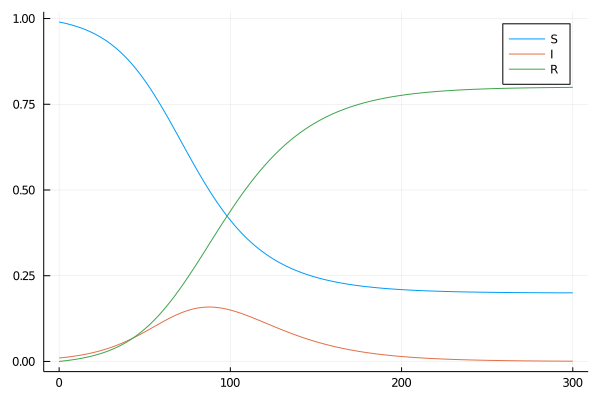

In [3]:
# 2. Run the SIR model with $\beta = 0.1$, $\gamma = 0.05$, and $S_0 = 0.99$, $I_0 = 0.01$ and $R_0 = 0$ for a 
#    time $T = 300$ with $h=0.1$. Plot $S$, $I$ and $R$ as a function of time $t$.

β = 0.1
γ = 0.05
S0 = 0.99
I0 = 0.01
R0 = 0
h = 0.1
T = 300

Ss, Is, Rs, time = euler_SIR(β, γ, S0, I0, R0, h, T)

plot(fmt=:png)
plot!(time, Ss, label="S")
plot!(time, Is, label="I")
plot!(time, Rs, label="R")


In [4]:
#3. Do you see an epidemic outbreak (i.e. a rapid growth in number of infected individuals, followed by a 
#   decline)? What happens after a long time? Does everybody get infected? 


In [5]:
#4. Make an interactive visualization in which you can vary $\beta$ and $\gamma$. What relation should $\beta$ 
#   and $\gamma$ have for an epidemic outbreak to occur? --> β > γ
S0 = 0.99
I0 = 0.01
R0 = 0
h = 0.1
T = 300
@manipulate for β in 0.0:0.01:1, γ  in 0.0:0.01:1
    
    Ss, Is, Rs, time = euler_SIR(β, γ, S0, I0, R0, h, T)

    plot(fmt=:png)
    plot!(time, Ss, label="S")
    plot!(time, Is, label="I")
    plot!(time, Rs, label="R")
    
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000107969b10, Task (runnable) @0x0000000107969b10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24

## Exercise 2: Numerical derivatives

For fitting we need optimization, and for optimization we will use derivatives. So in this question we see one method for calculating derivatives numerically.

In [6]:
#1. Define a function deriv that takes a function $f: \mathbb{R} \to \mathbb{R}$, a number $a$ and an optional 
#   $h$ with default value 0.001, and calculates the finite difference approximation
#   $$f'(a) \simeq \frac{f(a + h) - f(a)}{h}$$
#   of the derivative $f'(a)$.
        
function deriv(f, a, h=0.001)
    return (f(a+h)-f(a))/h
end

deriv (generic function with 2 methods)

In [7]:
#2. Write a function tangent_line that calculates the tangent line to $f$ at a point $a$. It should also accept 
#   a value of $x$ at which it will calculate the height of the tangent line. Use the function deriv to calculate 
#   $f'(a)$. --> a little confusing 

function tangent_line(f, a)
    
    m = deriv(f, a)
    # f'(a) = f(a) --> At point of intersection the two are the same 
    # --> m*a+c = f(a) --> c=f(a) = m*a
    c = f(a) - m*a
    t(x) = (m * x) + c
    return t
end

tangent_line (generic function with 1 method)

In [8]:
#3. Make an interactive visualization of the function $f(x) = x^3 - 2x$, showing the tangent line at a point 
#  $a$ and allowing you to vary $a$. Make sure that the line is indeed visually tangent to the graph!

f(x) = x^3 - 2x
@manipulate for a in -5.0:0.01:5.0
    
    plot(-5:0.1:5, f, fmt=:png)
    plot!(-5:0.1:5, x->tangent_line(f, a)(x))
    
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1001,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
501, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000108e05450, Task (runnable) @0x0000000108e05450), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-5.0\",\"-4.99\",\"-4.98\",\"-4.97\",\"-4.96\",\"-4.95\",\"-4.94\",\"-4.93\",\"-4.92\",\"-4.91\",\"-4.9\",\"-4.89\",\"-4.88\",\"-4.87\",\"-4.86\",\"-4.85\",\"-4.84\",\"-4.83\",\"-4.82\",\"-4.81\",\"-4.8\",\"-4.79\",

In [9]:
#4. Write functions ∂x(f, a, b) and ∂y(f, a, b) that calculate the partial derivatives 
#   $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ at $(a, b)$ of a function 
#   $f : \mathbb{R}^2 \to \mathbb{R}$ (i.e. a function that takes two real numbers and returns one real).
#   Recall that $\frac{\partial f}{\partial x}$ is the derivative of the single-variable function 
#   $g(x) := f(x, b)$ obtained by fixing the value of $y$ to $b$.

#   You should use anonymous functions for this. These have the form x -> x^2, meaning "the function that sends 
#   $x$ to $x^2$".

function dx(f, a, b)
    return deriv(x->f(x, b), a)
end

function dy(f, a, b)
    return deriv(y->f(a, y), b)
end

dy (generic function with 1 method)

In [10]:
#5. Write a function gradient(f, a, b) that calculates the gradient of a function $f$ at the point $(a, b)$, 
#   given by the vector $\nabla f(a, b) := (\frac{\partial f}{\partial x}(a, b), 
#  \frac{\partial f}{\partial y}(a, b))$.

function gradient(f, a, b)
    return dx(f, a, b), dy(f, a, b)
end

gradient (generic function with 1 method)

## Exercise 3: Minimization using gradient descent

In this exercise we will use gradient descent to find local minima of (smooth enough) functions.

To do so we will think of a function as a hill. To find a minimum we should "roll down the hill".

In [11]:
#1. Write a function gradient_descent_1d(f, x0) to minimize a 1D function, i.e. a function 
#   $f: \mathbb{R} \to \mathbb{R}$.

#   To do so we notice that the derivative tells us the direction in which the function increases. So we take 
#   steps in the opposite direction, of a small size $η$ (eta).

#   Use this to write the function starting from the point x0 and using your function deriv to approximate the 
#   derivative.

#   Take a reasonably large number of steps, say 100, with $\eta = 0.01$.

#   What would be a better way to decide when to end the function? 

function gradient_descent_1d(f, x0, N=100)
    x = x0
    η = 0.01
    points = []
    for steps in 1:N
        m = deriv(f, x)
        if m > 0
            x = x - η
        else
            x = x +  η
        end
        push!(points, (x, f(x)))
    end
    return points
end

gradient_descent_1d (generic function with 2 methods)

In [12]:
#2. Write an interactive visualization showing the progress of gradient descent on the function
#   $$f(x) = x^{4} +3x^{3} - 3x + 5$$

#  Make sure that it does indeed get close to a local minimum. 
#  How can you find different local minima? --> by changing x0

f(x) = x^4 +3*x^3 - 3*x + 5
x0=1.4
points = gradient_descent_1d(f, x0)
@manipulate for step in 0:1:100
    p_1 = plot(-3:0.01:1.5, f, fmt=:png)
    plot!(points[step], m=:o, leg=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010717a890, Task (runnable) @0x000000010717a890), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"

In [109]:
#3. Write a function gradient_descent_2d(f, x0, y0) that does the same for functions $f(x, y)$ of two variables.
#   Multivariable calculus tells us that the gradient $\nabla f(a, b)$ at a point $(a, b)$ is the direction 
#   in which the function increases the fastest. So again we should take a small step in the opposite direction.

function gradient_descent_2d(f, x0, y0, N = 100, η = 0.01)
    x = x0
    y = y0
    points = []
    for steps in 1:N
        dx, dy = gradient(f, x, y)
        if dx > 0
            x = x - η
        else
            x = x +  η
        end
        
        if dy > 0
            y = y - η
        else
            y = y +  η
        end
        
        push!(points, (x, y, f(x, y)))
    end
    return points
end


gradient_descent_2d (generic function with 3 methods)

In [110]:
#4. Apply this to the Himmelblau function $f(x, y) := (x^2 + y - 11)^2 + (x + y^2 - 7)^2$. Visualize the 
#   trajectory using both contours (contour function) and a 2D surface (surface function).

#   Can you find different minima?

#   You can try to install the PlotlyJS and (if necessary) ORCA packages and activate it with using Plots; 
#   plotlyjs(). This will / should give an interactive 3D plot. (But don't spend time on it if it doesn't 
#   immediately work.)

f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2

x0 = 4
y0 = 4
N = 100
points = gradient_descent_2d(f, x0, y0)

xs = -5:0.1:5
ys = -5:0.1:5
p_1 = contour(xs, ys, f)
#p_2 = surface(xs, ys, f)
#hbox(p_1, p_2)

@manipulate for step in 0:1:N
    plot!(p_1, (points[step][1], points[step][2]), m=:o, leg=false)
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001078ba410, Task (runnable) @0x00000001078ba410), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"

## Exercise 4: Learning parameter values

In this exercise we will apply gradient descent to fit a simple function $y = f_{a, b}(x)$ to some data given as pairs $(x_i, y_i)$. Here $a$ and $b$ are parameters that appear in the form of the function $f$. We want to find the parameters that best fit to the given data.

To do so we need to define what "best" means. We will define a measure of the distance between the function and the data, given by a loss function, which itself depends on the values of $a$ and $b$. Then we will minimize the loss function over $a$ and $b$ to find those values that minimize this distance, and hence are "best" in this precise sense.

The iterative procedure by which we gradually adjust the parameter values to improve the loss function is often called machine learning or just learning, since the computer is "discovering" information in a gradual way, which is supposed to remind us of how humans learn. [It doesn't, and it's not.]

In [14]:
#1. Load the data from the file some_data.csv into vectors xs and ys.
data = CSV.read("some_data.csv", DataFrame);
xs = data.Column1;
ys = data.Column2;

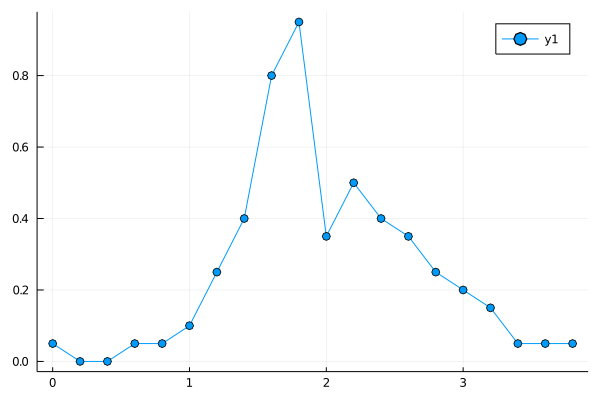

In [15]:
#2. Plot the data. What does it remind you of?
plot(xs, ys, m=:o, fmt=:png)

In [16]:
#3. Let's try to fit a gaussian (normal) distribution. Its PDF with mean $\mu$ and standard deviation $\sigma$ is
#   $$f_{\mu, \sigma}(x) := \frac{1}{\sigma \sqrt{2 \pi}}\exp \left[- \frac{(x - \mu)^2}{2 \sigma^2} \right]$$
#   Define this function as f(x, μ, σ).

f(x, μ, σ) = (1/(σ * √(2 * π))) * (ℯ^ ((- (x - μ)^2)/(2 * σ^2)))


f (generic function with 2 methods)

In [17]:
#4. Define a loss function to measure the "distance" between the actual data and the function. It will depend on 
#   the values of $\mu$ and $\sigma$ that you choose:
#   $$ \mathcal{L}(\mu, \sigma) := \sum_i [f_{\mu, \sigma}(x_i) - y_i]^2 $$
L(μ, σ) = sum((f.(xs, [μ], [σ]) .- ys) .^ 2)

L (generic function with 1 method)

In [18]:
#5. Use your gradient_descent function to find a local minimum of $\mathcal{L}$, starting with initial values 
#   $\mu = 0$ and $\sigma = 1$.
#   What are the final values for $\mu$ and $\sigma$ that you find?
μ = 0
σ = 1
points = gradient_descent_2d(L, μ, σ);
μ_final, σ_final = points[end][1], points[end][2];
@show μ_final, σ_final

(μ_final, σ_final) = (1.0000000000000007, 1.4800000000000004)


(1.0000000000000007, 1.4800000000000004)

In [19]:
#6. Modify the gradient descent function to store the whole history of the values of $\mu$ and $\sigma$ that it 
#   went through. -- Already doing this!
#   Make an interactive visualization showing how the resulting curve $f_{\mu, \sigma}$ evolves over time, 
#   compared to the original data.
#  ("Time" here corresponds to the iterations in the gradient descent function.)
μ0 = 0
σ0 = 1
N = 1000
points = gradient_descent_2d(L, μ, σ, N)

@manipulate for step in 0:1:N
    plot(xs, ys, m=:o, fmt=:png, label="Data")
    plot!(-5:0.01:5, x->f(x, μ0, σ0), label="Start")
    μ = points[step][1]
    σ = points[step][2]
    plot!(-5:0.01:5, x->f(x, μ, σ), label="Current fit")
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1001,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
501, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000107178b50, Task (runnable) @0x0000000107178b50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",

## Exercise 5: Putting it all together -- fitting an SIR model to data

In this exercise we will fit the (non-spatial) SIR ODE model from Exercise 1 to the (spatial) data you generated in Problem Set 4. If we are able to find a good fit, that might (or might not) constitute evidence that space "does not matter" too much for the dynamics of these models. If the fit is not so good, perhaps there is an important effect of space. (As usual in statistics, and indeed in modelling in general, we should cautious of making categorical claims.)

This fitting procedure will be different from that in Exercise 4, however: we no longer have an explicit form for the function that we are fitting! So what should we do?

We will try to find the parameters $\beta$ and $\gamma$ for which the output of the ODEs when we simulate it with those parameters best matches the data!

In [ ]:
#1. Re-run your spatial simulation from Problem Set 4 for a bigger system and make sure there is an epidemic 
#   outbreak for the parameters you use.
#   Save the data to a CSV file from that notebook, using the following code. You may need to install the Tables 
#   package.
#   using CSV, Tables
#   CSV.write("mydata.csv", Tables.table(M))
#   where M is a matrix storing $t$, $S$, $I$ and $R$ as a function of time $t$ in separate columns.
#   If you have vectors, you can make them into a matrix using hcat(ts, Ss, Is, Rs). If you prefer, you can make 
#   a dataframe instead.

In [80]:
#2. Load your data into the current notebook. Make sure to include this data in a zip file with your notebook when 
#   you submit the pset.
#   Extract the data into vectors ts, Ss, Is and Rs.
ps4_data = CSV.read("mydata.csv", DataFrame);

ts = ps4_data.Column1;
Ss = ps4_data.Column2./100;
Is = ps4_data.Column3./100;
Rs = ps4_data.Column4./100;

In [82]:
# 3. Make a loss function $\mathcal{L}(\beta, \gamma)$. This will compare the solution of the SIR equations 
#    with parameters $\beta$ and $\gamma$ with your data.To do this, once we have generated the solution of the 
#    SIR equations with parameters $\beta$ and $\gamma$, we must evaluate that solution at times $t$ from the 
#    vector ts, so that we can compare with the data at that time.Normally we would do this by some kind of 
#    interpolation (fitting a function locally through nearby data points). As a cheap alternative, we will just 
#    use the results corresponding to the closest value $t'$ with $t' < t$ that does occur in the solution of the 
#    ODEs. Write a function to calculate this value.(You should be able to do it without searching through the 
#    whole vector. Hint: Use the fact that the times are equally spaced.) The loss function should take the 
#    form$$\mathcal{L} = \mathcal{L}_S + 2 \mathcal{L}_I + \mathcal{L}_R$$
#    where e.g. $\mathcal{L}_S$ is the loss function for the $S$ data, defined as in [4.4]. The factor 2 weights 
#    $I$ more heavily, since the behaviour of $I$ is what we particularly care about, so we want to fit that 
#    better. You should experiment with different weights to see what effect it has.

function loss(ys_model, ys, factor)
    indexes= [i*factor+1 for i in 0:length(ys)-1]
    return sum((ys_model[indexes] .- ys) .^ 2)
end

function L(β , γ)
    
    S0 = 0.99
    I0 = 0.01
    R0 = 0
    h = 0.1
    T = 3000
    Ss_model, Is_model, Rs_model, time = euler_SIR(β, γ, S0, I0, R0, h, T)
    
    factor=1/h
    Ls = loss(Ss_model, Ss, factor)
    Li = loss(Is_model, Is, factor)
    Lr = loss(Rs_model, Rs, factor)
    
    return Ls + 2* Li + Lr
end

    

L (generic function with 1 method)

In [83]:
# S0 = 0.99
# I0 = 0.01
# R0 = 0
# h = 0.1
# T = 3000
# Ss_model, Is_model, Rs_model, time = euler_SIR(β, γ, S0, I0, R0, h, T)
# Ls = loss(Ss_model, Ss, 10)

In [117]:
#4. Minimize the loss function and make an interactive visualization of how the solution of the SIR model 
#   compares to the data, as the parameters change during the gradient descent procedure.

#   If you made it this far, congratulations -- you have just taken your first step into the exciting world of 
#   scientific machine learning!

β = 0.1
γ = 0.05
N = 1000
points = gradient_descent_2d(L, β, γ, N, 0.0001);
β_final, γ_final = points[end][1], points[end][2];
@show β_final, γ_final

(β_final, γ_final) = (0.02439999999999808, 0.001999999999999602)


(0.02439999999999808, 0.001999999999999602)

In [118]:
S0 = 0.99
I0 = 0.01
R0 = 0
h = 0.1
T = 3000
N = 1000

@manipulate for step in 1:N
    plot(ts, Ss, fmt=:png, label="S Data", c="darkblue")
    plot!(ts, Is, label="I Data", c="darkred")
    plot!(ts, Rs, label="R Data", c="darkgreen")
    
    β_step, γ_step = points[step][1], points[step][2];
    
    Ss_model, Is_model, Rs_model, time = euler_SIR(β_step, γ_step, S0, I0, R0, h, T)
    plot!(time, Ss_model, fmt=:png, label="S Model", c="lightblue")
    plot!(time, Is_model, label="I Model", c="red")
    plot!(time, Rs_model, label="R Model", c="lightgreen")
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
500, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010707b190, Task (runnable) @0x000000010707b190), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32

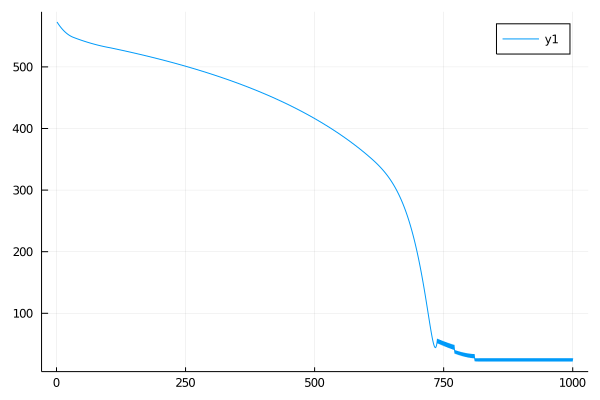

In [119]:
loss_func_val=[points[i][3] for i in 1:length(points) ]
plot(loss_func_val)